# Launch TuriCreate

In [1]:
import turicreate as tc

# Load image dataset

In [3]:
image_train = tc.SFrame('image_train_data/')
image_test = tc.SFrame('image_test_data/')

## Explore dataset

In [4]:
image_train

Columns:
	id	int
	image	Image
	label	str
	deep_features	array
	image_array	array

Rows: 2005

Data:
+-----+----------------------+------------+-------------------------------+
|  id |        image         |   label    |         deep_features         |
+-----+----------------------+------------+-------------------------------+
|  24 | Height: 32 Width: 32 |    bird    | [0.24287176132202148, 1.09... |
|  33 | Height: 32 Width: 32 |    cat     | [0.5250879526138306, 0.0, ... |
|  36 | Height: 32 Width: 32 |    cat     | [0.5660159587860107, 0.0, ... |
|  70 | Height: 32 Width: 32 |    dog     | [1.129795789718628, 0.0, 0... |
|  90 | Height: 32 Width: 32 |    bird    | [1.7178692817687988, 0.0, ... |
|  97 | Height: 32 Width: 32 | automobile | [1.5781855583190918, 0.0, ... |
| 107 | Height: 32 Width: 32 |    dog     | [0.0, 0.0, 0.2206778526306... |
| 121 | Height: 32 Width: 32 |    bird    | [0.0, 0.23753464221954346,... |
| 136 | Height: 32 Width: 32 | automobile | [0.0, 0.0, 0.0, 0.0, 0.0, ... |
| 138 | Height: 32 Width: 32 |    bird    | [0.6589357256889343, 0.0, ... |
+-----+----------------------+------------+-------------------------------+
+-------------------------------+
|          image_array          |
+-------------------------------+
| [73.0, 77.0, 58.0, 71.0, 6... |
| [7.0, 5.0, 8.0, 7.0, 5.0, ... |
| [169.0, 122.0, 65.0, 131.0... |
| [154.0, 179.0, 152.0, 159.... |
| [216.0, 195.0, 180.0, 201.... |
| [33.0, 44.0, 27.0, 29.0, 4... |
| [97.0, 51.0, 31.0, 104.0, ... |
| [93.0, 96.0, 88.0, 102.0, ... |
| [35.0, 59.0, 53.0, 36.0, 5... |
| [205.0, 193.0, 195.0, 200.... |
+-------------------------------+
[2005 rows x 5 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [5]:
image_train.show()

Materializing SFrame

Warning: Skipping column 'image'. Unable to show columns of type 'image'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

/mnt/d/ML Specialization/Course 1 - ML Foundations/Exercise/venv/lib/python3.6/site-packages/turicreate/visualization/_plot.py:461: UserWarning: Displaying only the first 100 rows.
  warnings.warn("Displaying only the first {} rows.".format(maximum_rows))



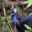
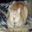
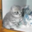
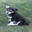
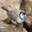
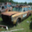
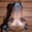
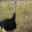
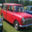
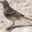
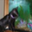
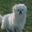
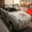
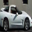
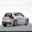
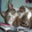
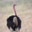
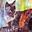
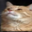
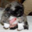
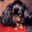
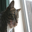
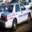
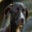
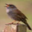
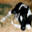
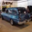
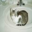
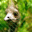
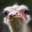
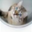
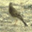
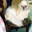
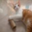
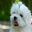
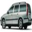
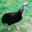
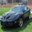
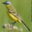
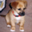
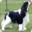
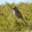
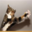
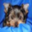
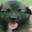
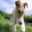
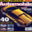
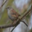
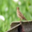
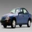
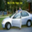
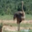
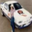
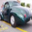
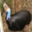
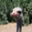
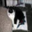
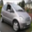
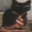
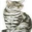
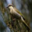
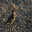
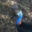
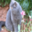
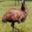
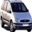
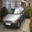
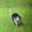
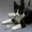
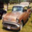
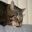
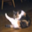
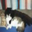
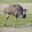
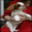
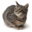
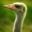
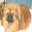
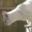
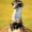
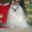
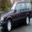
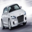
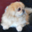
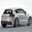
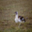
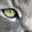
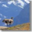
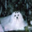
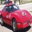
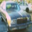
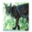
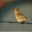
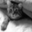
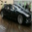
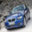
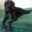
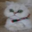
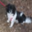
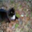

In [6]:
image_train.explore()

# Train a classifier on raw image pixels

In [7]:
raw_pixel_model = tc.logistic_classifier.create(image_train, target='label', features=['image_array'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 3072

Number of coefficients      : 9219

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.018053  | 1.206080     | 0.268382          | 0.247525            |

| 1         | 11       | 6.156121  | 1.464466     | 0.418067          | 0.396040            |

| 2         | 12       | 6.156121  | 1.549817     | 0.259454          | 0.386139            |

| 3         | 18       | 0.905105  | 1.817620     | 0.430147          | 0.475248            |

| 4         | 19       | 1.000000  | 1.903501     | 0.448004          | 0.465347            |

| 9         | 30       | 0.680640  | 2.549522     | 0.520483          | 0.475248            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

# Make predictions based on simple model based on raw pixels

In [9]:
image_test[0:3]['label']

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

In [10]:
raw_pixel_model.predict(image_test[0:3])     # wrong predictions

dtype: str
Rows: 3
['bird', 'cat', 'bird']

In [11]:
image_test[0:10]['label']

dtype: str
Rows: 10
['cat', 'automobile', 'cat', 'automobile', 'dog', 'dog', 'dog', 'bird', 'dog', 'dog']

In [12]:
raw_pixel_model.predict(image_test[0:10])     # only 3 predictions correct rest all wrong

dtype: str
Rows: 10
['bird', 'cat', 'bird', 'automobile', 'cat', 'dog', 'bird', 'bird', 'bird', 'bird']

# Evaluating the simple model based on raw pixels

In [13]:
raw_pixel_model.evaluate(image_test)      # very bad accuracy

{'accuracy': 0.46775,
 'auc': 0.722309083333331,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     bird     |       dog       |  245  |
 |     dog      |       cat       |  195  |
 |     bird     |       cat       |  127  |
 |     dog      |       dog       |  482  |
 |     cat      |       dog       |  370  |
 |     dog      |    automobile   |   48  |
 |     bird     |    automobile   |   67  |
 |  automobile  |    automobile   |  531  |
 |     cat      |       bird      |  246  |
 |     cat      |    automobile   |   87  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.46913023687144095,
 'log_loss': 1.218555458532376,
 'precision

# Train a model using transfer learning of deep features from 2012 ImageNet competition (Pre-computed)

In [ ]:
# deep_learning_model = tc.load_model('imagenet_model_iter45')
# image_train['deep_featutes'] = deep_learning_model.extract_features(image_train)

# Given the deep features, train a logistic classifier

In [14]:
deep_features_model = tc.logistic_classifier.create(image_train, target='label', features=['deep_features'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 4096

Number of coefficients      : 12291

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 0.228584     | 0.734769          | 0.673267            |

| 1         | 6        | 0.250000  | 0.545720     | 0.769433          | 0.752475            |

| 2         | 8        | 0.274918  | 0.791585     | 0.773634          | 0.742574            |

| 3         | 12       | 0.824755  | 1.188684     | 0.767332          | 0.772277            |

| 4         | 14       | 0.902891  | 1.452380     | 0.805147          | 0.772277            |

| 9         | 22       | 0.982979  | 2.597447     | 0.915441          | 0.772277            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

# Make predictions based on deep_features_model

In [15]:
image_test[0:3]['label']

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

In [16]:
deep_features_model.predict(image_test[0:3])     # all correct predictions

dtype: str
Rows: 3
['cat', 'automobile', 'cat']

In [17]:
image_test[0:10]['label']

dtype: str
Rows: 10
['cat', 'automobile', 'cat', 'automobile', 'dog', 'dog', 'dog', 'bird', 'dog', 'dog']

In [18]:
deep_features_model.predict(image_test[0:10])     # all correct predictions except one

dtype: str
Rows: 10
['cat', 'automobile', 'cat', 'automobile', 'dog', 'dog', 'dog', 'bird', 'dog', 'cat']

# Evaluating the deep_features_model

In [19]:
deep_features_model.evaluate(image_test)     # awesome accuracy

{'accuracy': 0.79475,
 'auc': 0.9397126250000059,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     bird     |       bird      |  845  |
 |  automobile  |       bird      |   23  |
 |     cat      |       cat       |  623  |
 |  automobile  |    automobile   |  956  |
 |     bird     |    automobile   |   11  |
 |  automobile  |       dog       |   8   |
 |     cat      |       bird      |  112  |
 |     bird     |       dog       |   47  |
 |     dog      |       bird      |   65  |
 |     cat      |    automobile   |   22  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.7932871918171598,
 'log_loss': 0.6745952690769814,
 'precisio